Data Science Internship at Zeotap- Task 1

In [2]:
#Importing the required dependencies
import pandas as pd
import numpy as np

#Loading the different csv files into pandas dataframe
customers=pd.read_csv(r"C:\Users\91996\Downloads\Customers.csv")
products=pd.read_csv(r"C:\Users\91996\Downloads\Products.csv")
transactions=pd.read_csv(r"C:\Users\91996\Downloads\Transactions - Transactions.csv")

#Printing the initial data tuple for each csv files
print(customers.head())
print(products.head())
print(transactions.head())

  CustomerID        CustomerName         Region  SignupDate
0      C0001    Lawrence Carroll  South America  2022-07-10
1      C0002      Elizabeth Lutz           Asia  2022-02-13
2      C0003      Michael Rivera  South America  2024-03-07
3      C0004  Kathleen Rodriguez  South America  2022-10-09
4      C0005         Laura Weber           Asia  2022-08-15
  ProductID              ProductName     Category   Price
0      P001     ActiveWear Biography        Books  169.30
1      P002    ActiveWear Smartwatch  Electronics  346.30
2      P003  ComfortLiving Biography        Books   44.12
3      P004            BookWorld Rug   Home Decor   95.69
4      P005          TechPro T-Shirt     Clothing  429.31
  TransactionID CustomerID ProductID      TransactionDate  Quantity  \
0        T00001      C0199      P067  2024-08-25 12:38:23         1   
1        T00112      C0146      P067  2024-05-27 22:23:54         1   
2        T00166      C0127      P067   2024-04-25 7:38:55         1   
3       

Data Preprocessing techniques

In [3]:
#Checking for the missing values
print(customers.info())
print(products.info())
print(transactions.info())

#Understanding the statisitics of the given data 
print(customers.describe())
print(products.describe())
print(transactions.describe())


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 200 entries, 0 to 199
Data columns (total 4 columns):
 #   Column        Non-Null Count  Dtype 
---  ------        --------------  ----- 
 0   CustomerID    200 non-null    object
 1   CustomerName  200 non-null    object
 2   Region        200 non-null    object
 3   SignupDate    200 non-null    object
dtypes: object(4)
memory usage: 6.4+ KB
None
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 100 entries, 0 to 99
Data columns (total 4 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   ProductID    100 non-null    object 
 1   ProductName  100 non-null    object 
 2   Category     100 non-null    object 
 3   Price        100 non-null    float64
dtypes: float64(1), object(3)
memory usage: 3.3+ KB
None
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1000 entries, 0 to 999
Data columns (total 7 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------

In [4]:
#Checking any NULL values if exists
print("NULL values in Customers DataFrame:")
print(customers.isnull().sum())

print("\n")

print("NULL values in Products DataFrame:")
print(products.isnull().sum())

print("\n")

print("NULL values in Transactions DataFrame:")
print(transactions.isnull().sum())

print("\n")

NULL values in Customers DataFrame:
CustomerID      0
CustomerName    0
Region          0
SignupDate      0
dtype: int64


NULL values in Products DataFrame:
ProductID      0
ProductName    0
Category       0
Price          0
dtype: int64


NULL values in Transactions DataFrame:
TransactionID      0
CustomerID         0
ProductID          0
TransactionDate    0
Quantity           0
TotalValue         0
Price              0
dtype: int64




Hence this ensures there is no missing values and the same can be verified above when we checked it using info() method

In [5]:
# Checking for duplicate rows in the 'customers' DataFrame
print("Duplicate rows in Customers DataFrame:")
print(customers.duplicated().sum())  

# Check for duplicate rows in the 'products' DataFrame
print("Duplicate rows in Products DataFrame:")
print(products.duplicated().sum())

# Check for duplicate rows in the 'transactions' DataFrame
print("Duplicate rows in Transactions DataFrame:")
print(transactions.duplicated().sum())  


Duplicate rows in Customers DataFrame:
0
Duplicate rows in Products DataFrame:
0
Duplicate rows in Transactions DataFrame:
0


So hence we have perfomed the steps of data cleaning and came to a conclusion that data is already cleaned and can be processed for the next steps

Exploratory Data Analysis (EDA)

In [6]:
#Considering merging all the dataframe into a single dataframe based on some column (using like concept of joins in SQL)
merged_data=pd.merge(transactions,customers,on='CustomerID',how='left')
merged_data=pd.merge(merged_data,products,on='ProductID',how='left')

print(merged_data.head())

  TransactionID CustomerID ProductID      TransactionDate  Quantity  \
0        T00001      C0199      P067  2024-08-25 12:38:23         1   
1        T00112      C0146      P067  2024-05-27 22:23:54         1   
2        T00166      C0127      P067   2024-04-25 7:38:55         1   
3        T00272      C0087      P067  2024-03-26 22:55:37         2   
4        T00363      C0070      P067  2024-03-21 15:10:10         3   

   TotalValue  Price_x     CustomerName         Region  SignupDate  \
0      300.68   300.68   Andrea Jenkins         Europe  2022-12-03   
1      300.68   300.68  Brittany Harvey           Asia  2024-09-04   
2      300.68   300.68  Kathryn Stevens         Europe  2024-04-04   
3      601.36   300.68  Travis Campbell  South America  2024-04-11   
4      902.04   300.68    Timothy Perez         Europe  2022-03-15   

                       ProductName     Category  Price_y  
0  ComfortLiving Bluetooth Speaker  Electronics   300.68  
1  ComfortLiving Bluetooth Speaker

Data Visualizations for deriving different business insights that we can draw from the given data

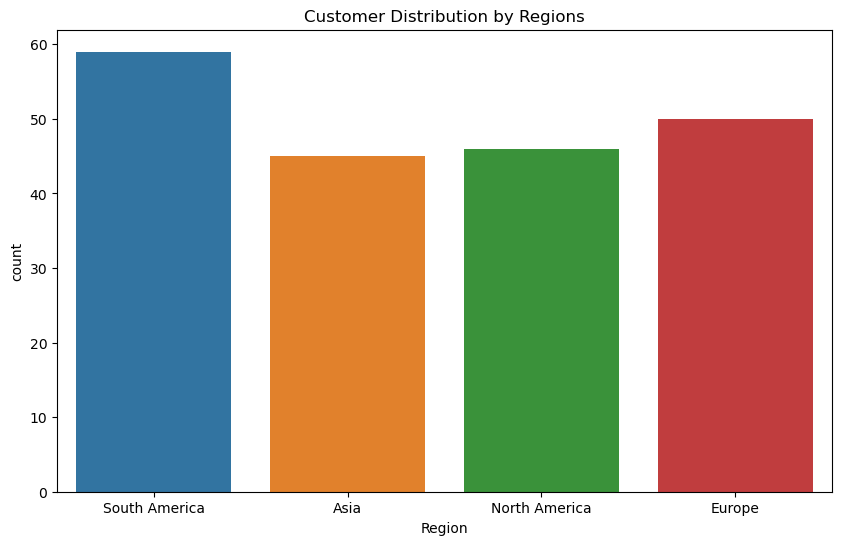

In [7]:
import matplotlib.pyplot as plt
import seaborn as sns

#Customer distribution by the region (continent) 
plt.figure(figsize=(10,6))
sns.countplot(x='Region',data=customers)
plt.title('Customer Distribution by Regions')
plt.show()

So from this visualization we can conclude that most of the customers who buy the products are from South America region and the least is from Asia so based on this data information the organization can check out where to launch new products if they are planning to, determine the region from which they can make the maximum profit and so on 

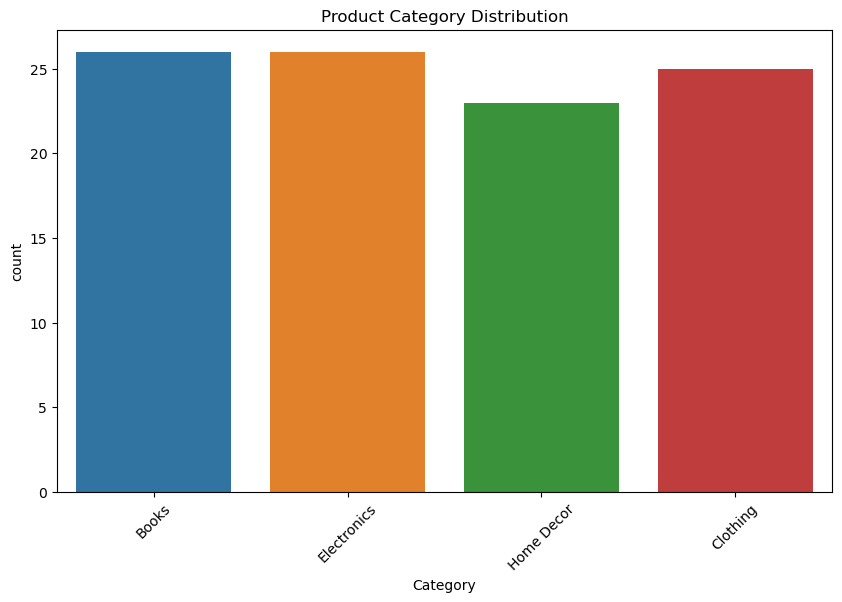

In [9]:
#Product category distribution
plt.figure(figsize=(10,6))
sns.countplot(x='Category',data=products)
plt.title('Product Category Distribution')
plt.xticks(rotation=45)
plt.show()

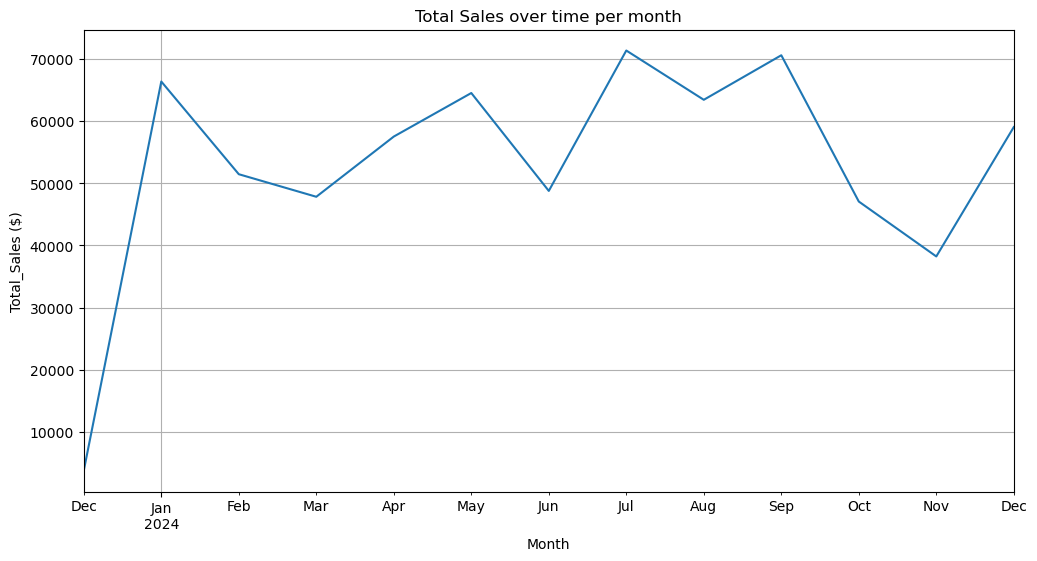

In [11]:
#Total Sales done over the time/ Sales trend
transactions['TransactionDate']=pd.to_datetime(transactions['TransactionDate']) #Necessary to convert the given date into the required format datetime64[ns] object
transactions['Month']=transactions['TransactionDate'].dt.to_period('M')
monthly_sales=transactions.groupby('Month')['TotalValue'].sum()
plt.figure(figsize=(12,6))
monthly_sales.plot(kind='line')
plt.title('Total Sales over time per month')
plt.xlabel('Month')
plt.ylabel('Total_Sales ($)')
plt.grid(True)
plt.show()

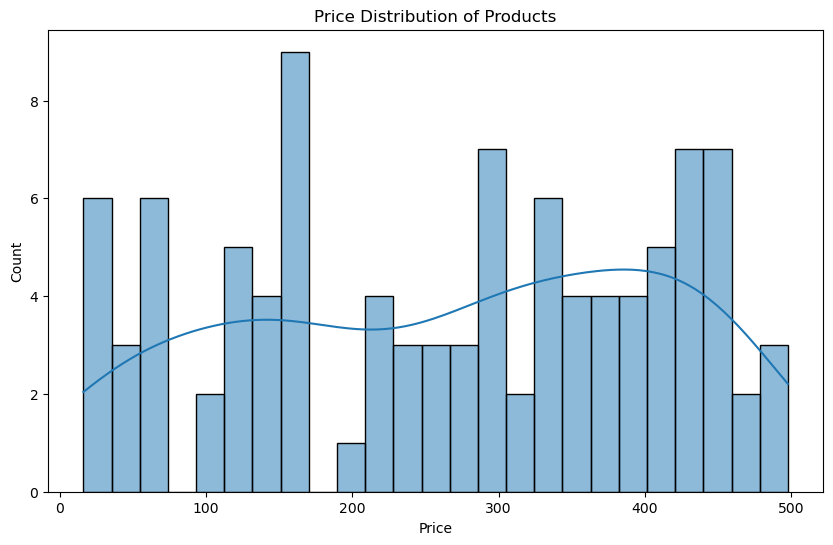

In [12]:
#Price distribution across different products
plt.figure(figsize=(10,6))
sns.histplot(products['Price'],kde=True,bins=25)
plt.title('Price Distribution of Products')
plt.show()

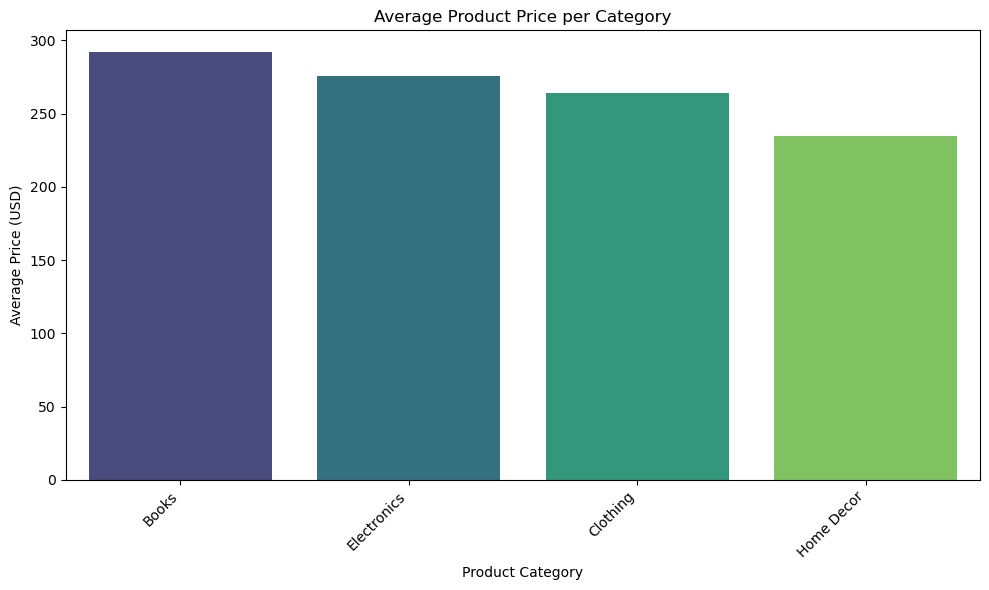

In [13]:
average_price_per_category=products.groupby('Category')['Price'].mean().reset_index()
average_price_per_category=average_price_per_category.sort_values(by='Price',ascending=False)
plt.figure(figsize=(10,6))
sns.barplot(data=average_price_per_category,x='Category',y='Price',palette='viridis')

plt.title('Average Product Price per Category')
plt.xlabel('Product Category')
plt.ylabel('Average Price (USD)')
plt.xticks(rotation=45, ha='right') 

plt.tight_layout()
plt.show()

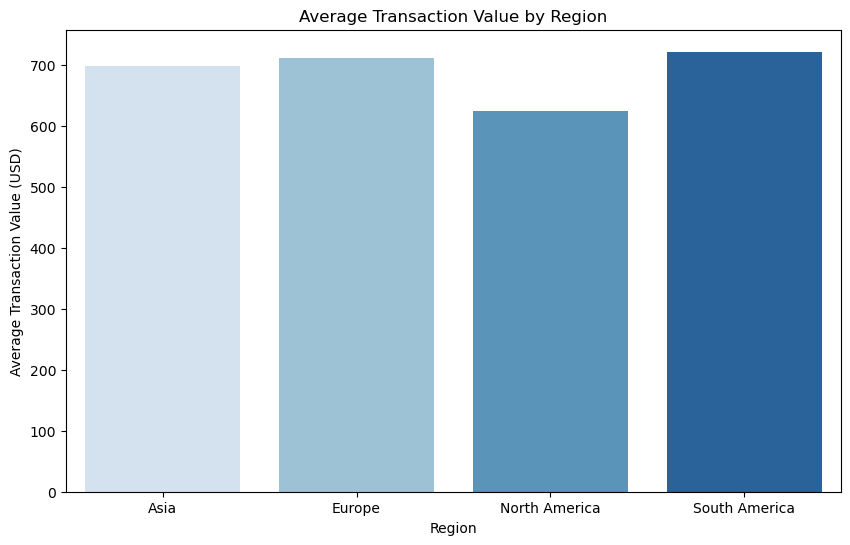

In [15]:
average_transaction_value = merged_data.groupby('Region')['TotalValue'].mean().reset_index()

plt.figure(figsize=(10, 6))
sns.barplot(data=average_transaction_value, x='Region', y='TotalValue', palette='Blues')
plt.title('Average Transaction Value by Region')
plt.xlabel('Region')
plt.ylabel('Average Transaction Value (USD)')
plt.show()


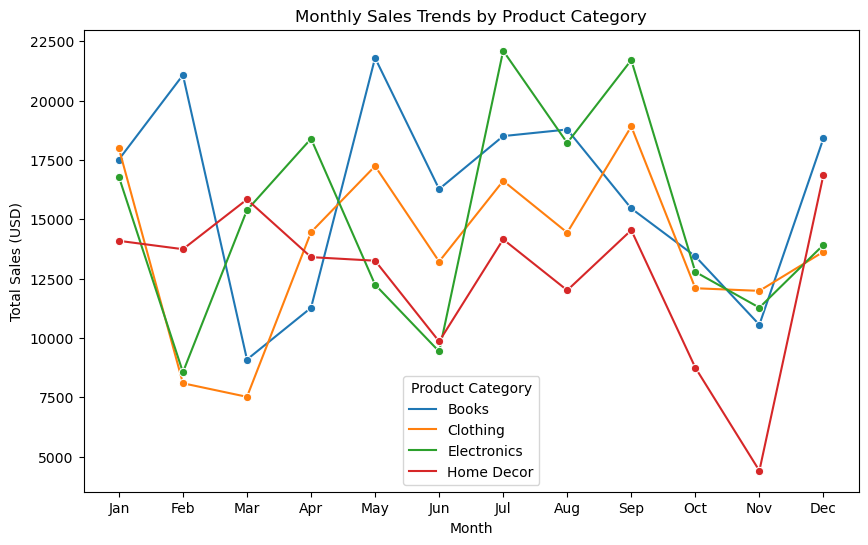

In [16]:
merged_data['Month'] = merged_data['TransactionDate'].dt.month
monthly_sales = merged_data.groupby(['Month', 'Category'])['TotalValue'].sum().reset_index()
plt.figure(figsize=(10, 6))
sns.lineplot(data=monthly_sales, x='Month', y='TotalValue', hue='Category', marker='o', palette='tab10')
plt.title('Monthly Sales Trends by Product Category')
plt.xlabel('Month')
plt.ylabel('Total Sales (USD)')
plt.xticks(ticks=range(1, 13), labels=['Jan', 'Feb', 'Mar', 'Apr', 'May', 'Jun', 'Jul', 'Aug', 'Sep', 'Oct', 'Nov', 'Dec'])
plt.legend(title='Product Category')
plt.show()


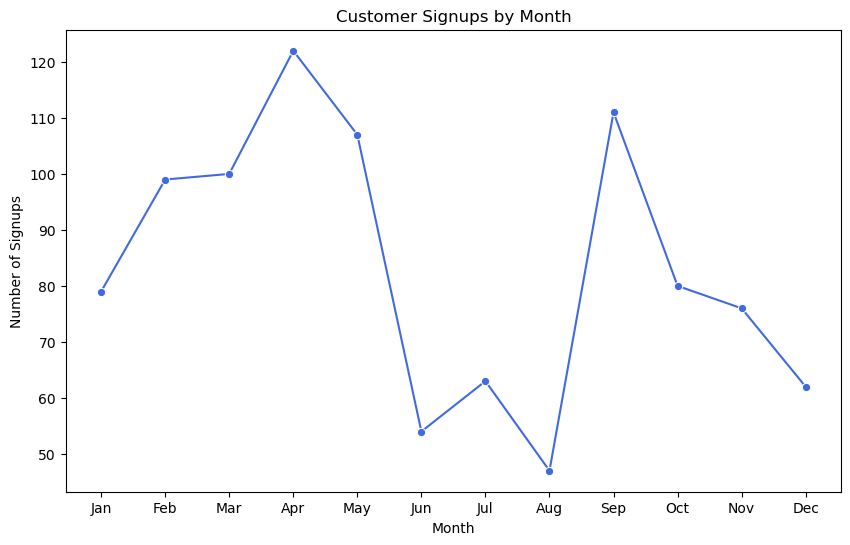

In [17]:
merged_data['SignupDate'] = pd.to_datetime(merged_data['SignupDate'])
merged_data['SignupMonth'] = merged_data['SignupDate'].dt.month
# Calculating the number of signups per month
signup_trends = merged_data.groupby('SignupMonth').size()

plt.figure(figsize=(10, 6))
sns.lineplot(x=signup_trends.index, y=signup_trends.values, marker='o', color='royalblue')
plt.title('Customer Signups by Month')
plt.xlabel('Month')
plt.ylabel('Number of Signups')
plt.xticks(ticks=range(1, 13), labels=['Jan', 'Feb', 'Mar', 'Apr', 'May', 'Jun', 'Jul', 'Aug', 'Sep', 'Oct', 'Nov', 'Dec'])
plt.show()


Hence from this EDA process and data visualization we can derive different meaningful insights by analyzing these plots for better insights.